# Setup

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Loading and exploring the data

In [67]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def explore_data(data):
    print(data.head().T)
    print(data.describe())
    print(data.info())

# Visualizing the data

In [79]:
def plot_histograms(data):
    data.hist(bins=15, figsize=(30, 15))
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(data):
    # Seleccionar solo columnas numéricas
    df_numeric = data.select_dtypes(include='number')
    plt.figure(figsize=(30, 15))
    sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.tight_layout()
    plt.show()

def plot_feature_relationships(data, target):
    # Define el nombre de la columna que deseas excluir
    column_to_exclude = target  # Reemplaza con el nombre de la columna que quieres quitar

    # Crea una lista de columnas para graficar excluyendo la columna no deseada
    columns_to_plot = [col for col in data.columns if col != column_to_exclude and col != 'Class']
    for column in columns_to_plot:
       plt.figure(figsize=(8, 4))
       sns.boxplot(x='Class', y=column, data=data)
       plt.title(f'Relationship between music class and {column}')
       plt.show()

# Preprocessing and feature engineering

In [69]:
def scale_features(data, target):
   scaler = StandardScaler()
   # Seleccionar solo las columnas flotantes que quieres escalar
   float_columns = data.select_dtypes(include=['float'])
# Aplicar el escalado Standard
   data_standarized = pd.DataFrame(scaler.fit_transform(float_columns), columns=float_columns.columns)

   # Crear el LabelEncoder
   label_encoder = LabelEncoder()

   # Ajustar y transformar la columna 'Class'
   music_df_class_encoded = label_encoder.fit_transform(data[target]) + 1  # +1 para empezar desde 1

   # Convertir a DataFrame
   df_class_encoded = pd.DataFrame(music_df_class_encoded, columns=['Class'])


   data_scaled = data_standarized.join(df_class_encoded, how='inner') 
    
   return data_scaled

# Splitting the dataset

In [70]:
def split_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Training the model

In [71]:
def train_model(X_train, y_train):
    model = LogisticRegression(solver='lbfgs',
                           C=0.2,
                           random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluating the model

In [72]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    report = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy},\n')
    print("Classification Report:")
    print(report)

# Cross Validation

In [73]:
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("Average Accuracy with CV:", np.mean(scores))

In [75]:
# Main function for running the pipeline
def main(filepath):
    data = load_data(filepath)
    #exploracion de datos 
    explore_data(data)
    plot_histograms(data)
    plot_correlation_matrix(data)
    plot_feature_relationships(data, 'Class')
    
    #Escalamiento, entrenamiento y modelado de los datos.
    data_scaled = scale_features(data, 'Class')
    X_train, X_test, y_train, y_test = split_data(data_scaled, 'Class')
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    cross_validate_model(model, data_scaled.drop('Class', axis=1), data_scaled['Class'])

    



                                                       0         1          2  \
Class                                              relax     relax      relax   
_RMSenergy_Mean                                    0.052     0.125      0.046   
_Lowenergy_Mean                                    0.591     0.439      0.639   
_Fluctuation_Mean                                  9.136      6.68     10.578   
_Tempo_Mean                                      130.043    142.24    188.154   
_MFCC_Mean_1                                       3.997     4.058      2.775   
_MFCC_Mean_2                                       0.363     0.516      0.903   
_MFCC_Mean_3                                       0.887     0.785      0.502   
_MFCC_Mean_4                                       0.078     0.397      0.329   
_MFCC_Mean_5                                       0.221     0.556      0.287   
_MFCC_Mean_6                                       0.118     0.799       0.14   
_MFCC_Mean_7                

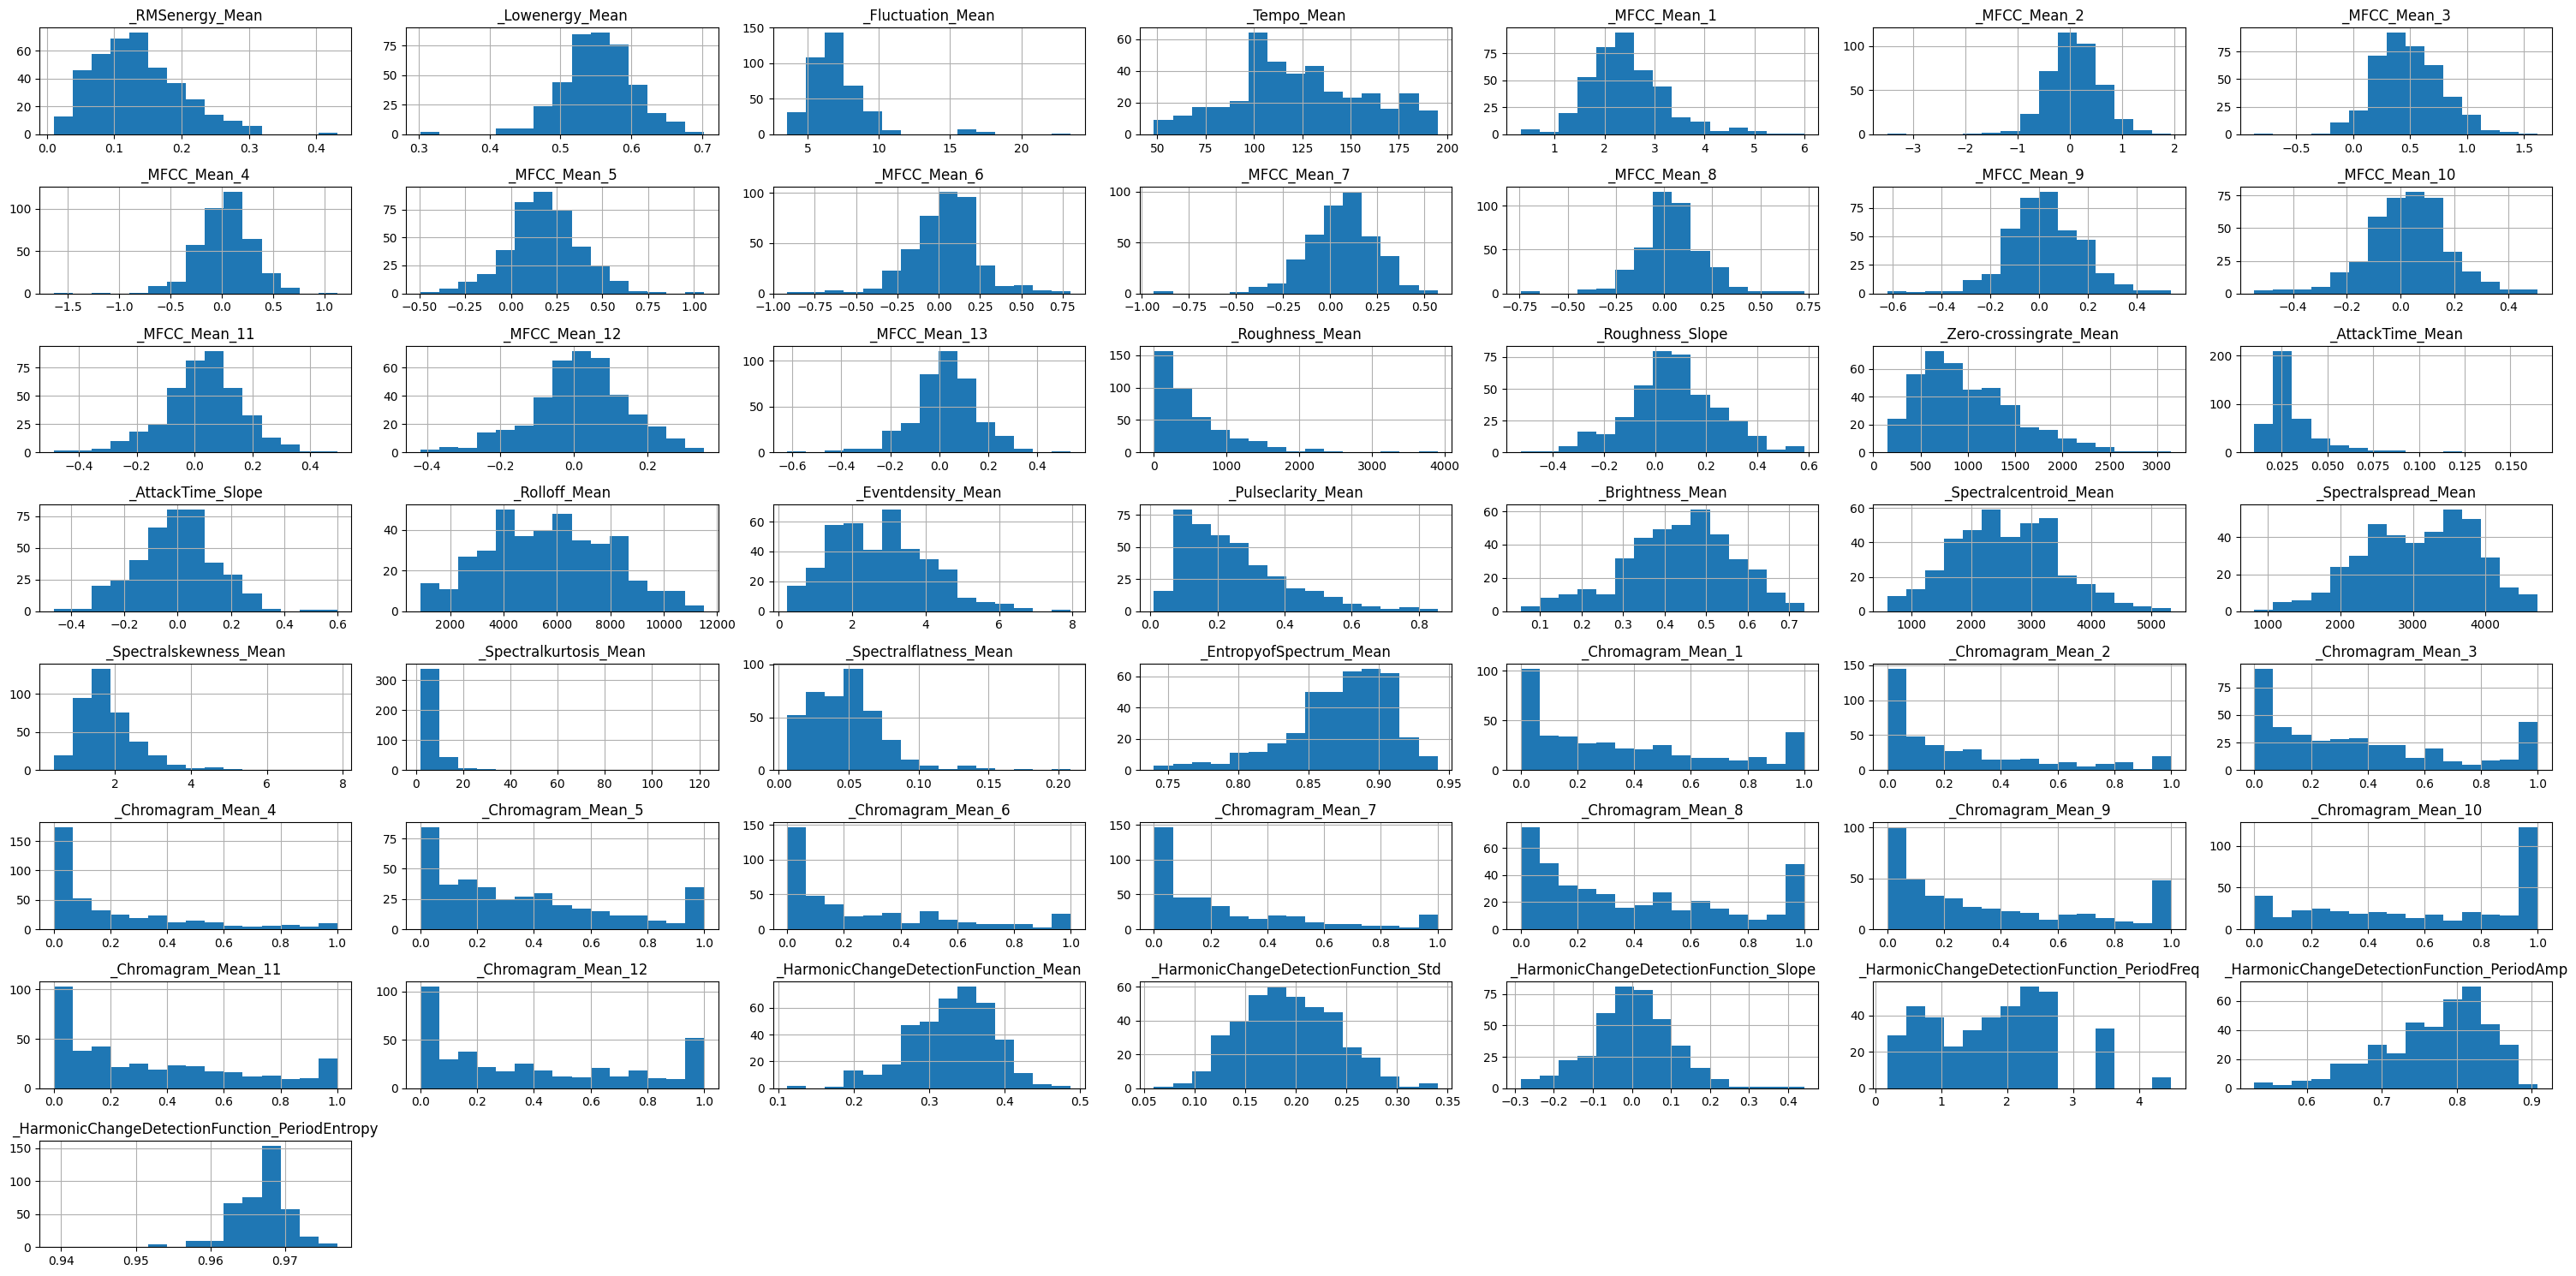

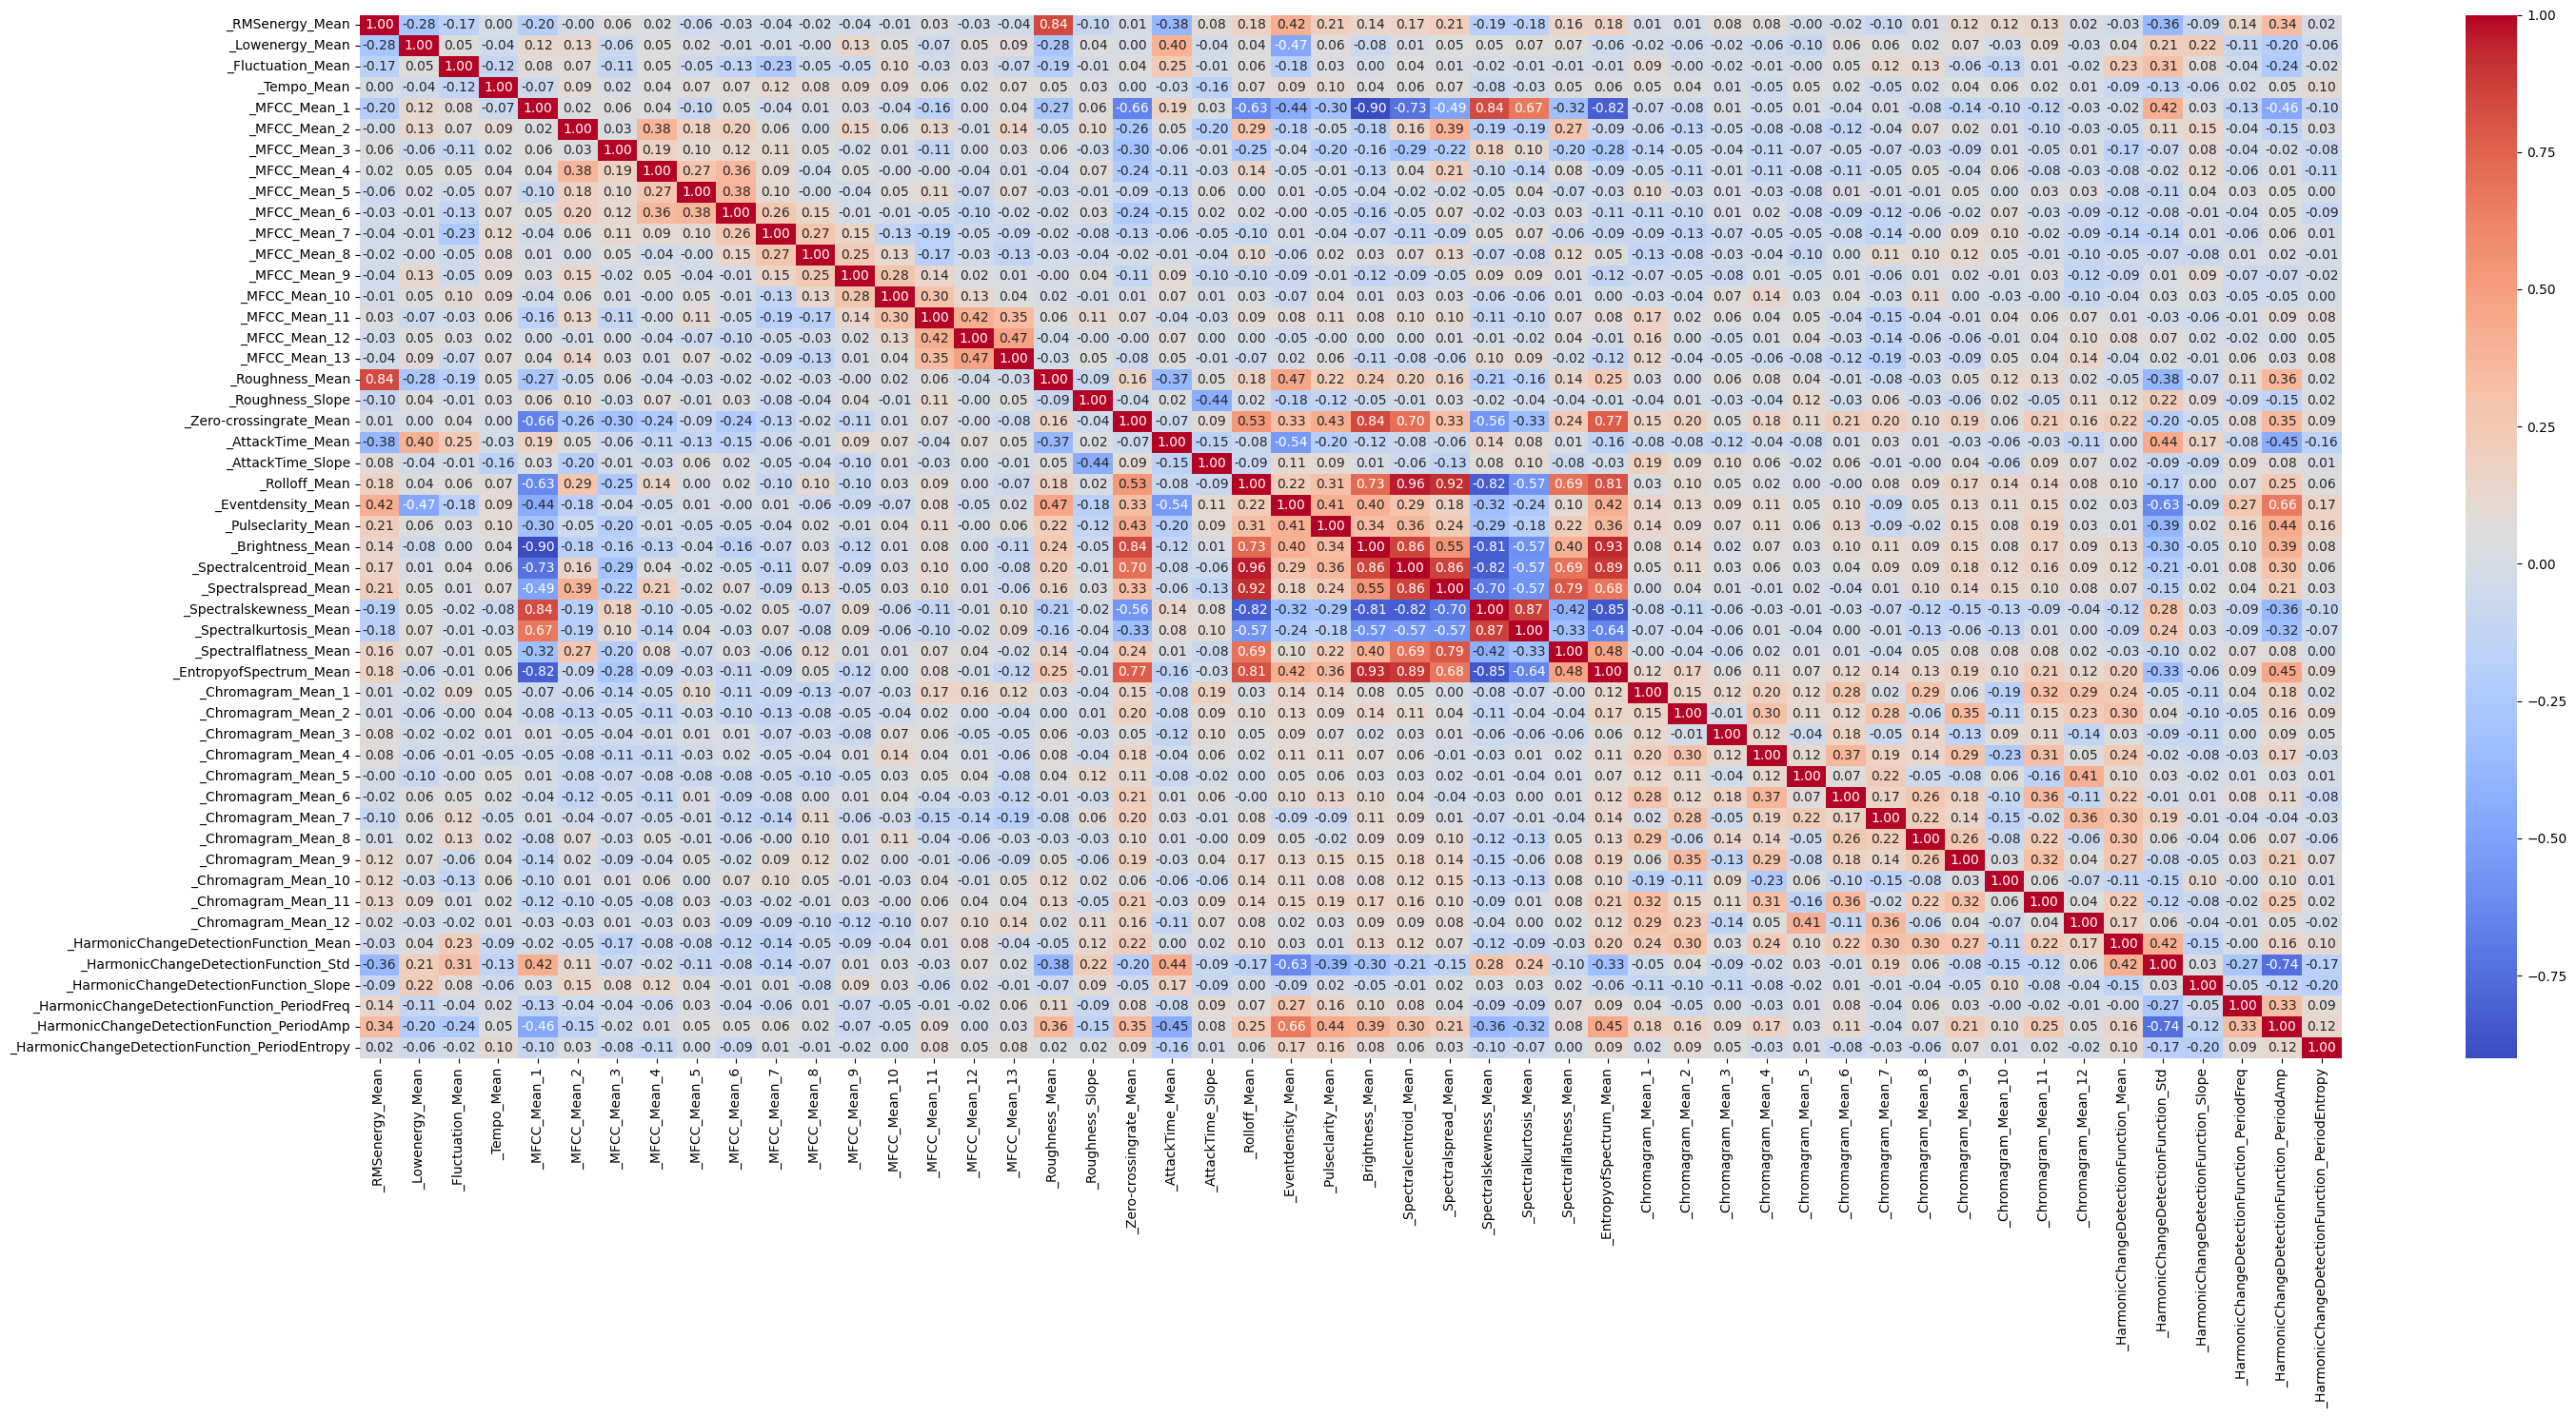

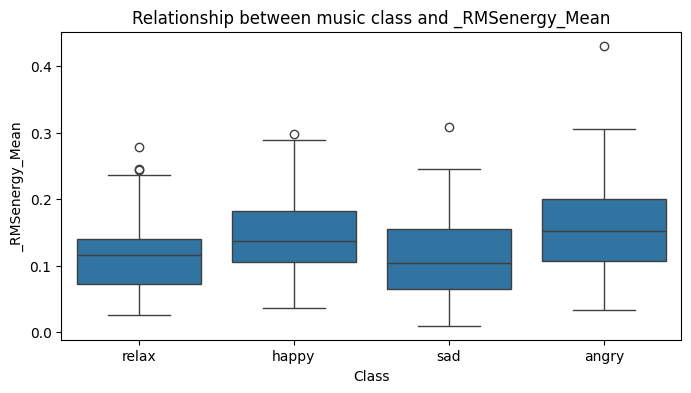

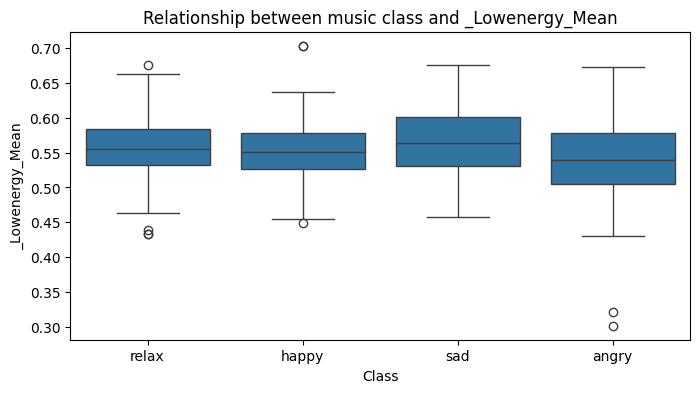

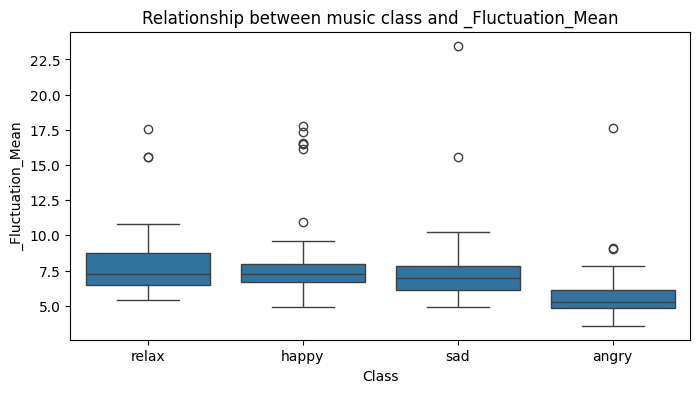

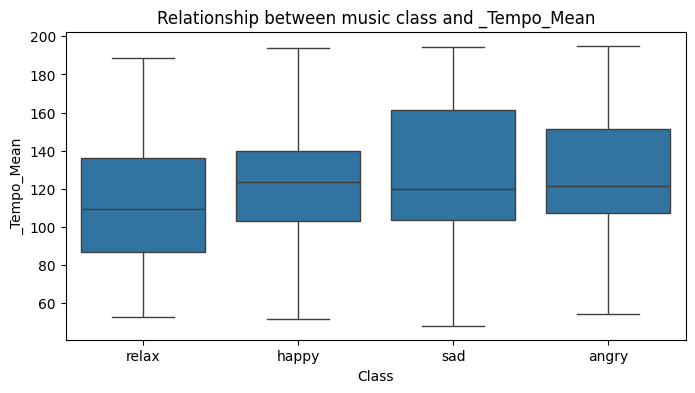

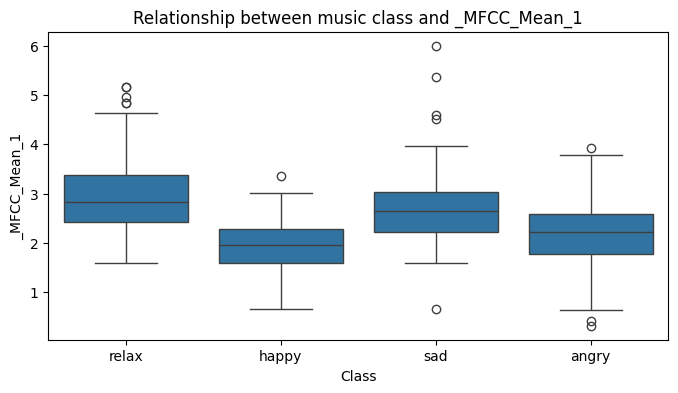

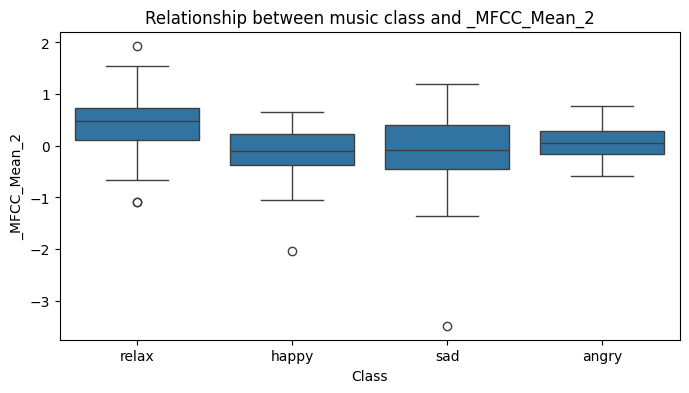

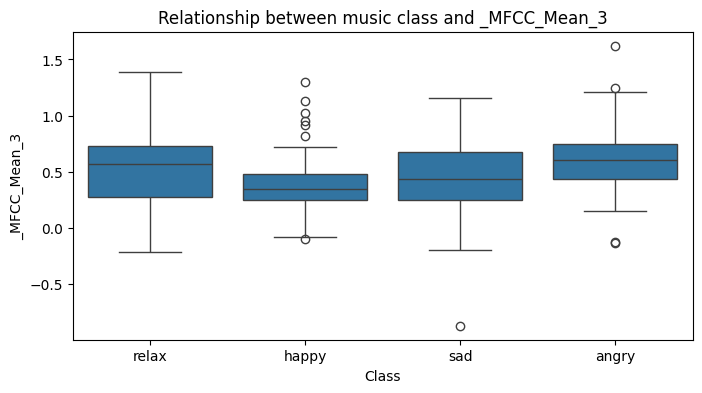

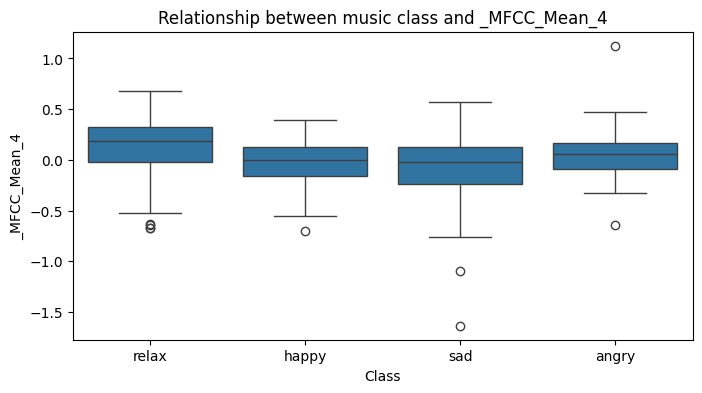

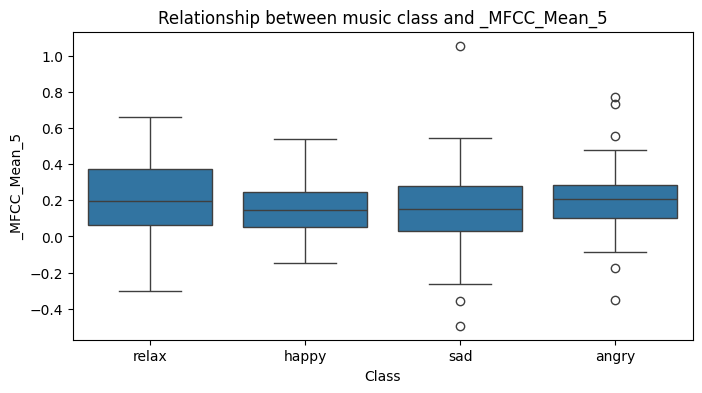

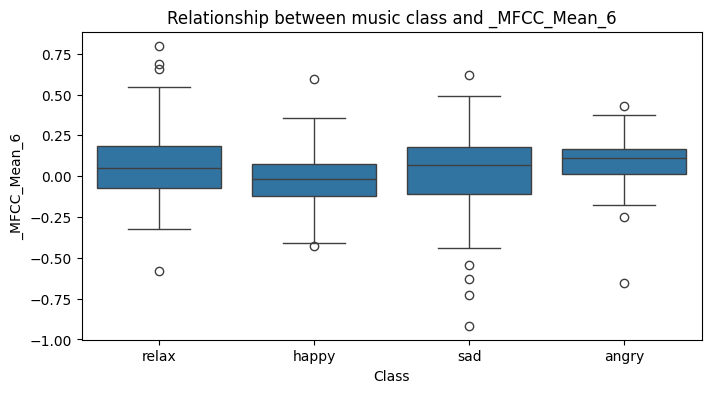

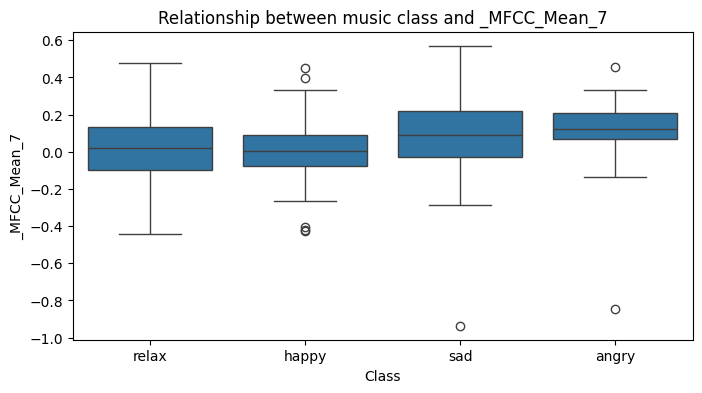

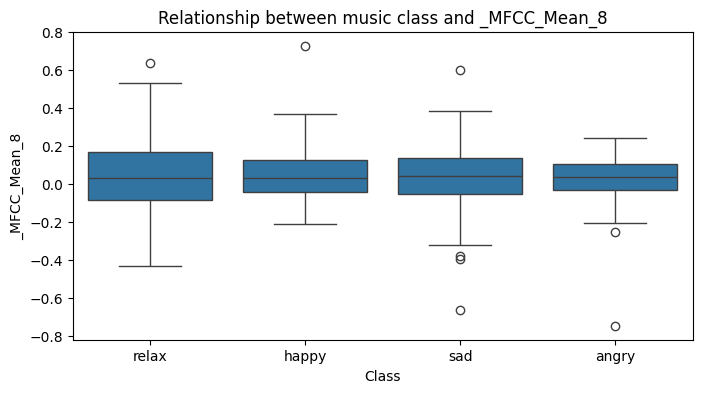

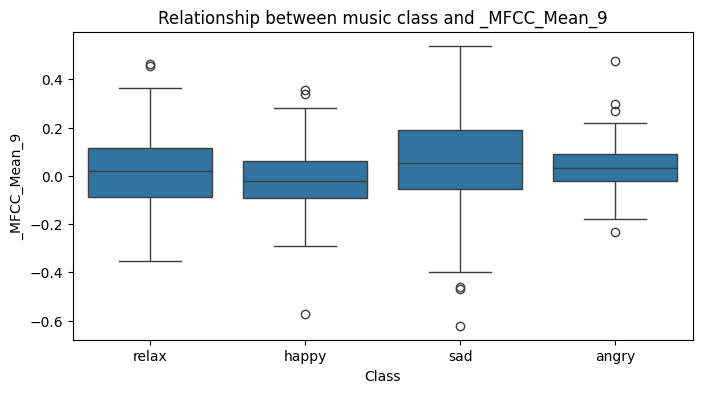

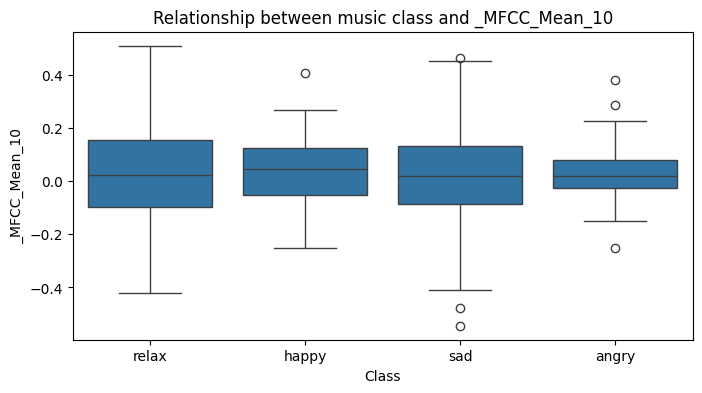

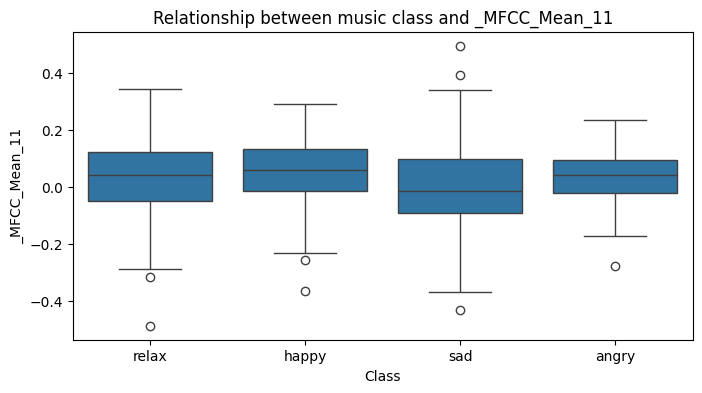

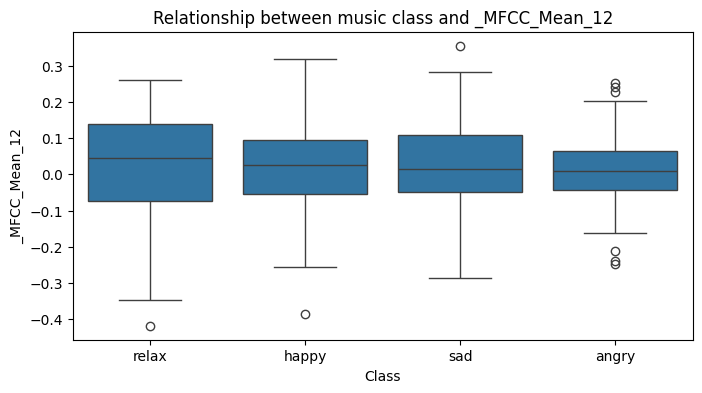

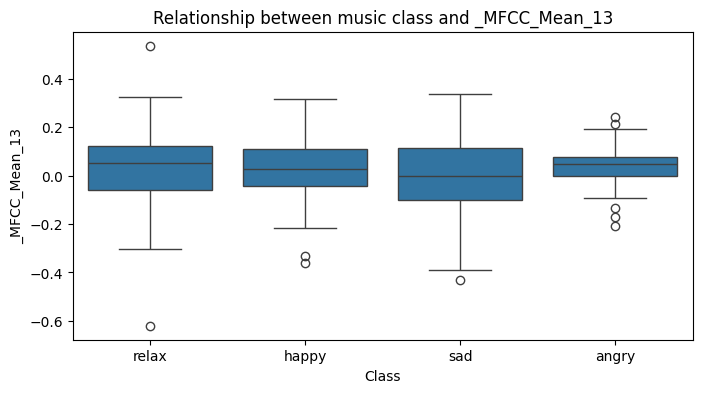

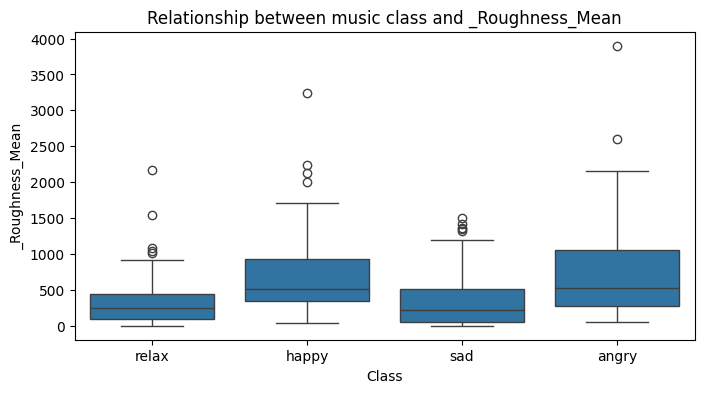

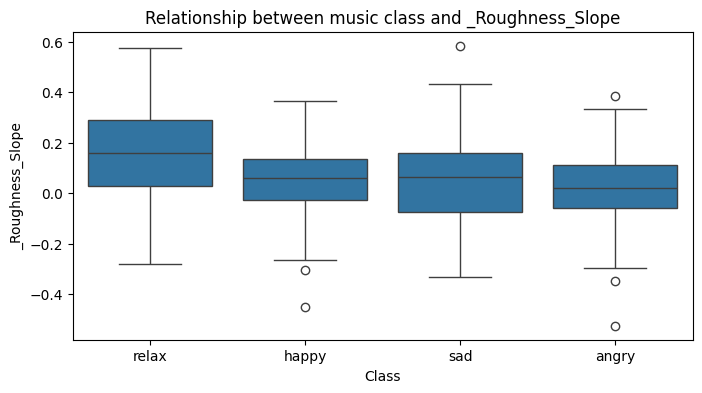

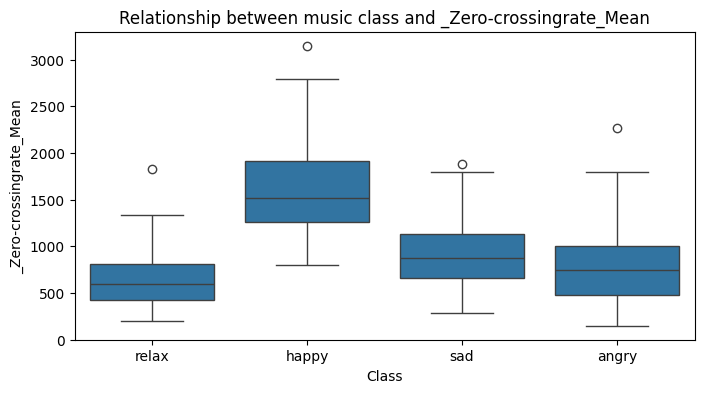

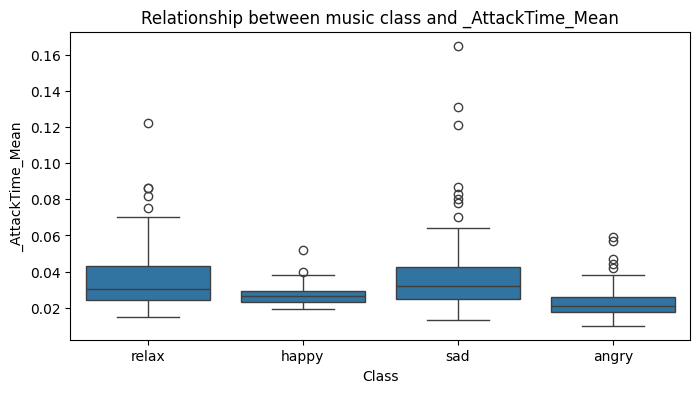

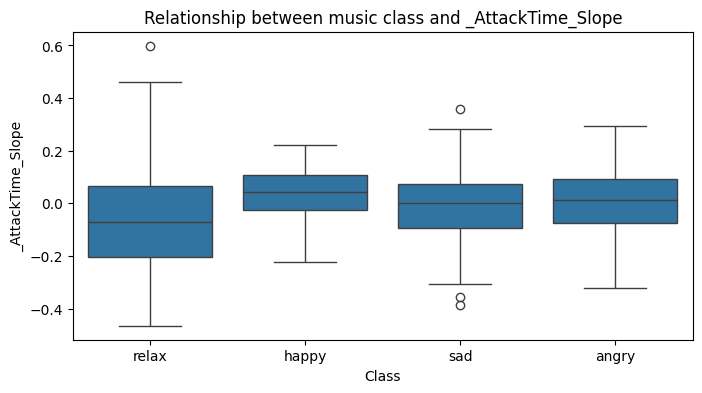

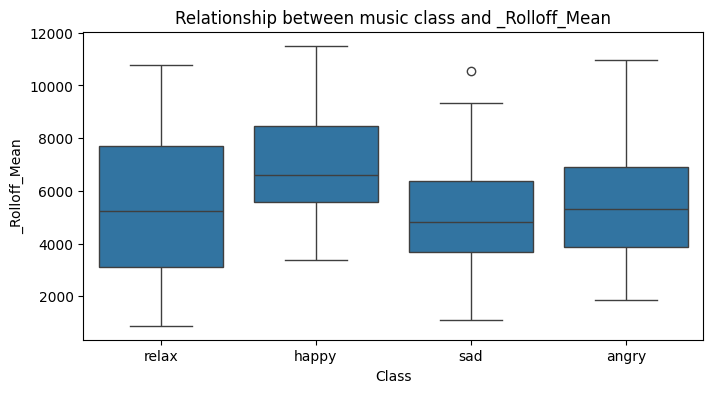

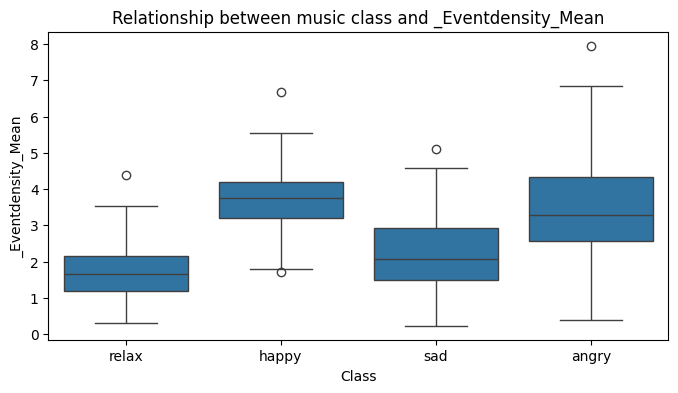

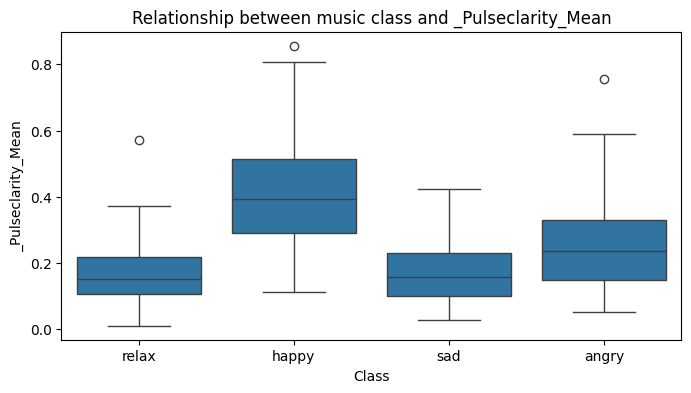

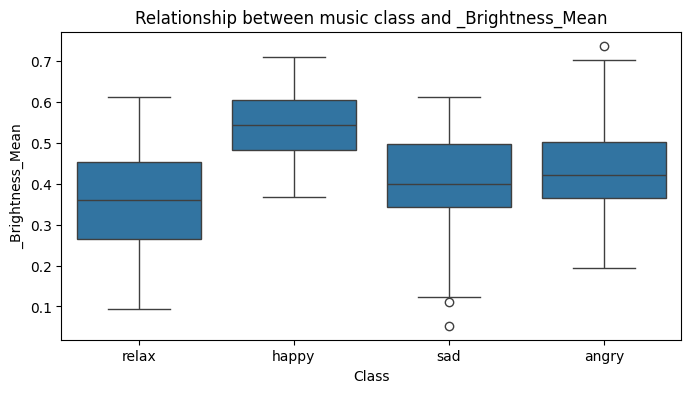

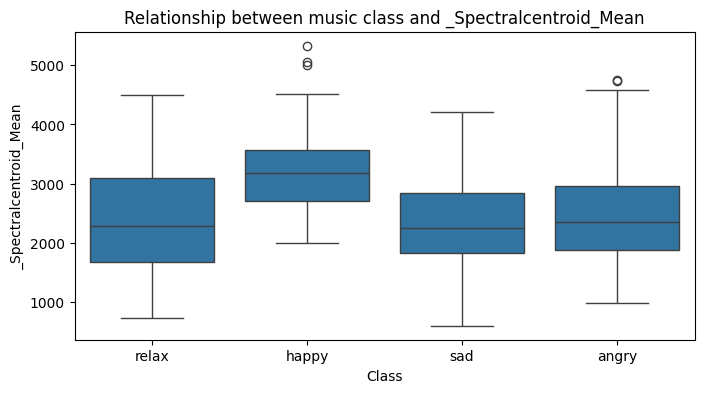

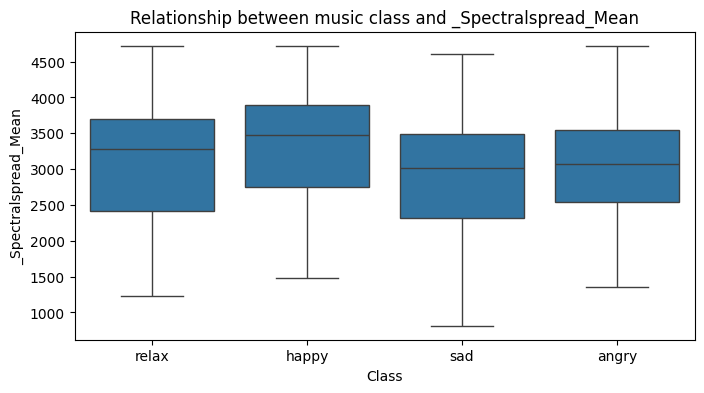

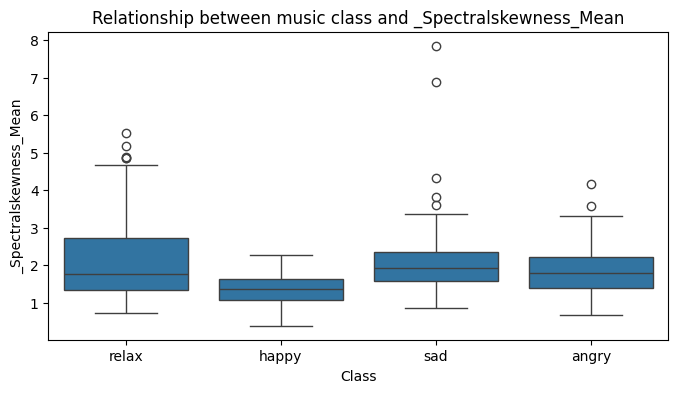

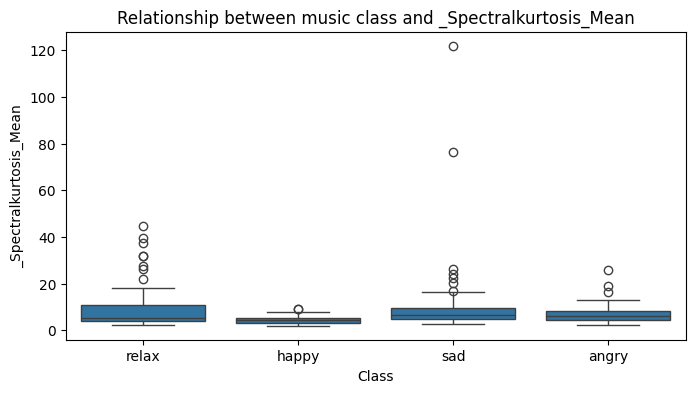

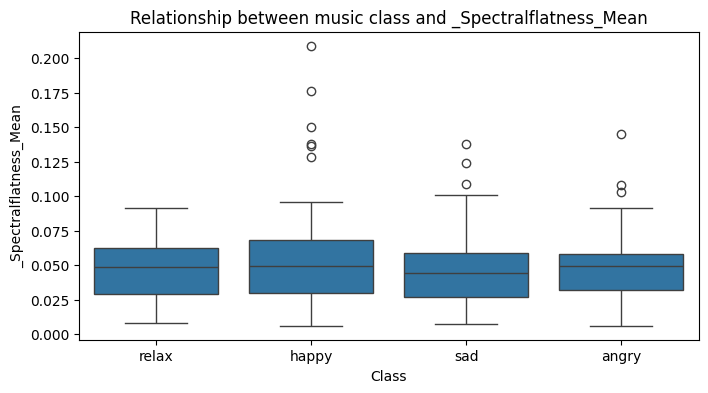

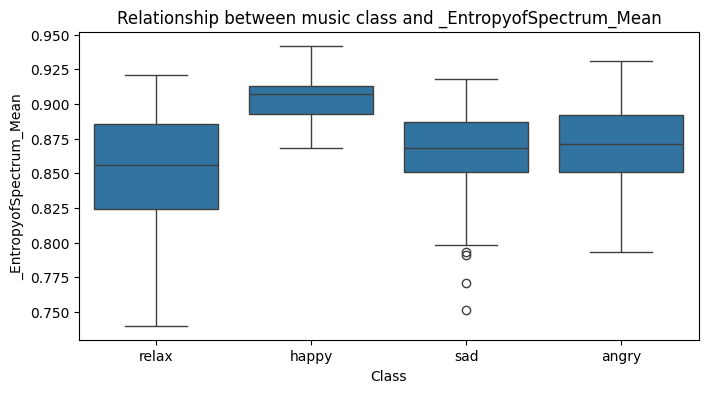

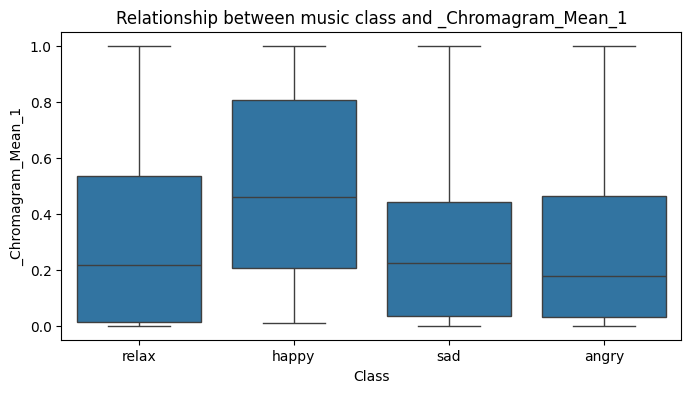

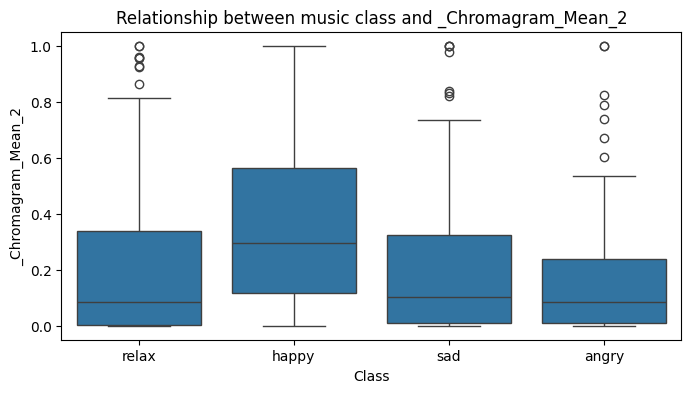

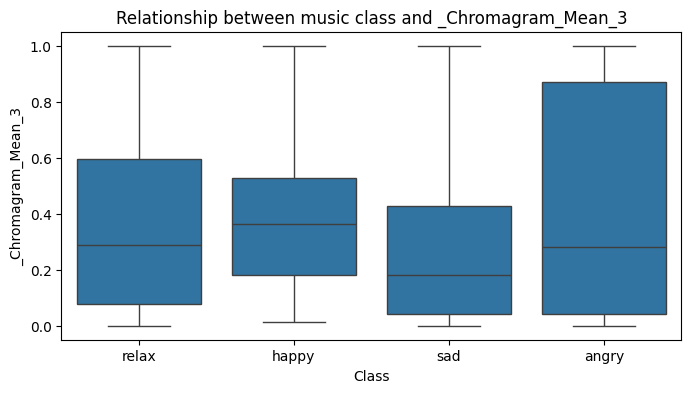

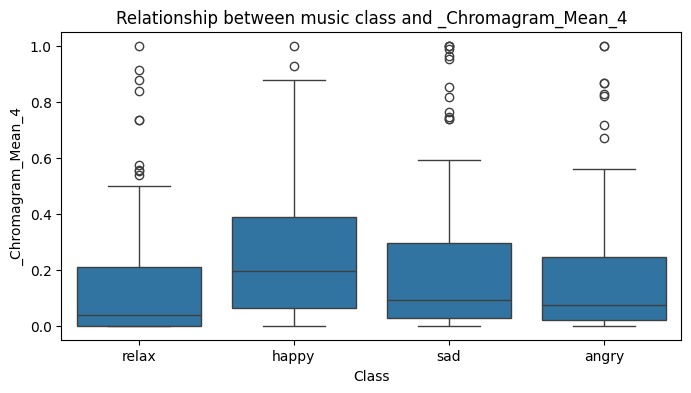

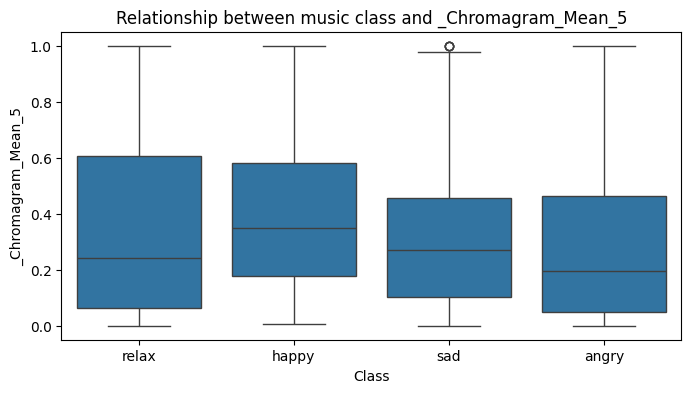

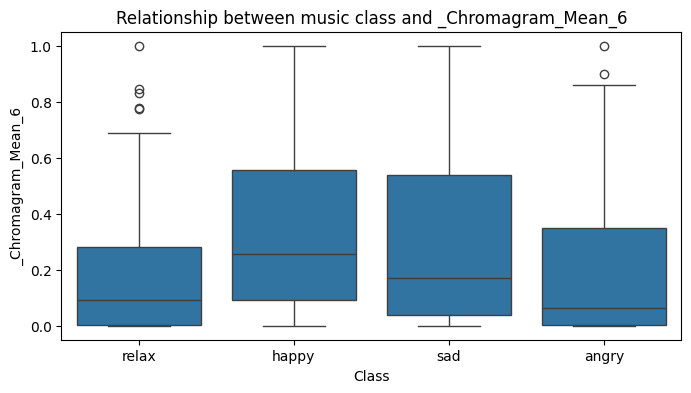

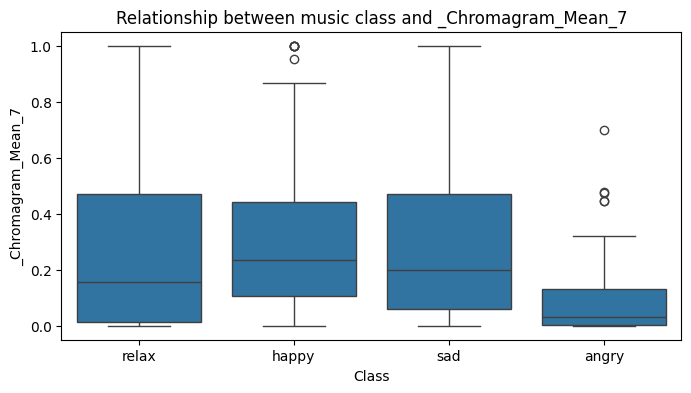

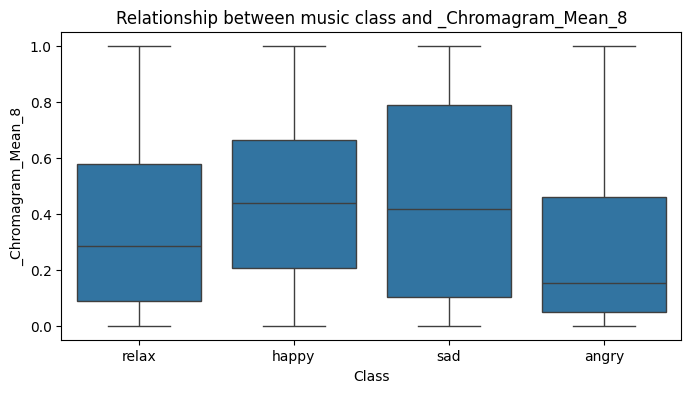

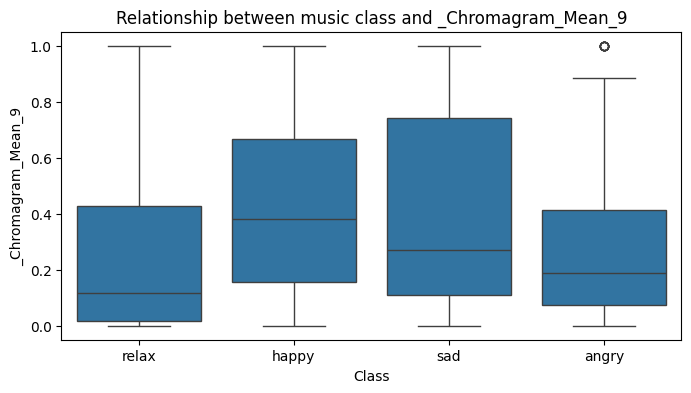

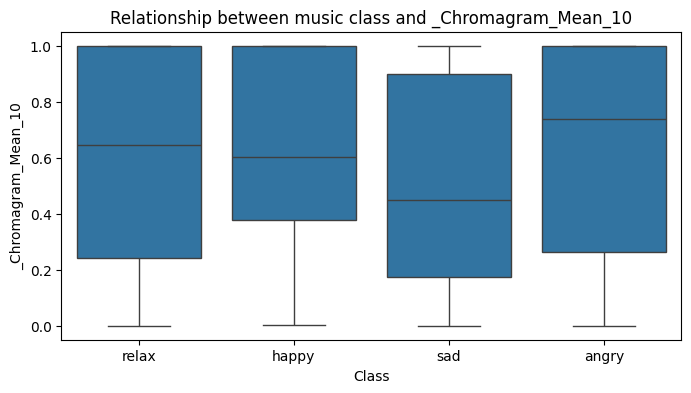

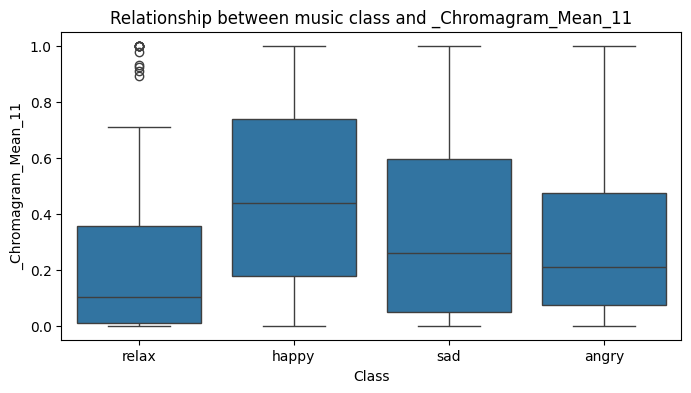

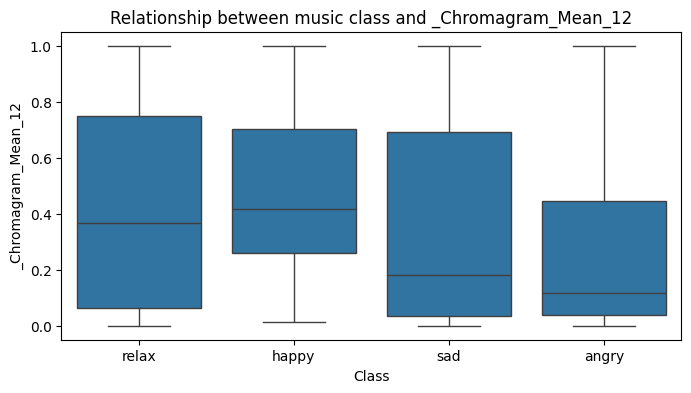

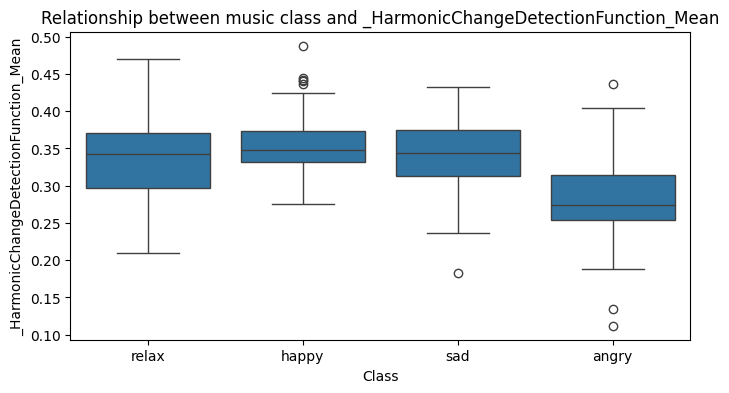

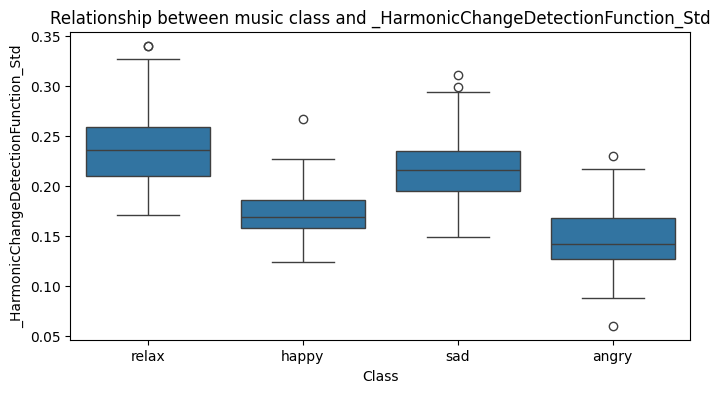

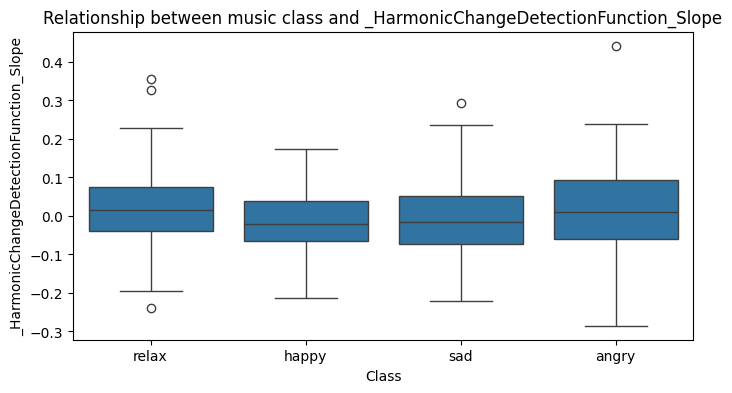

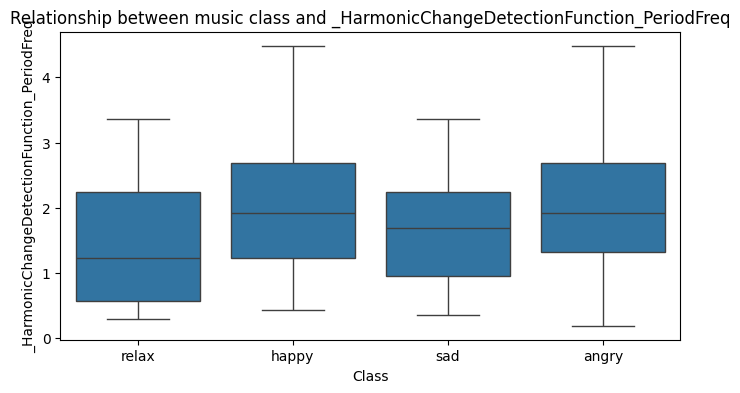

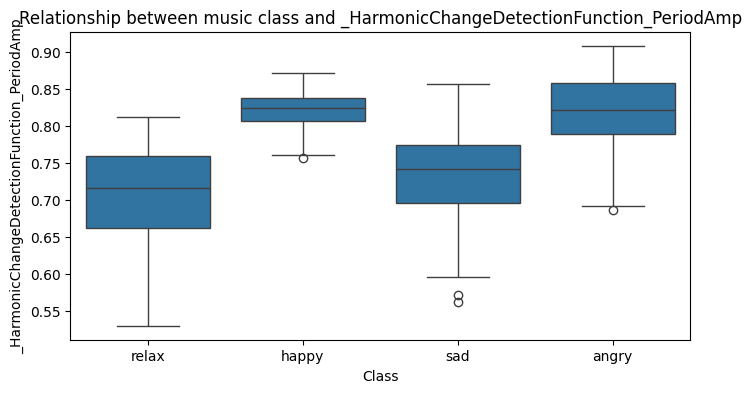

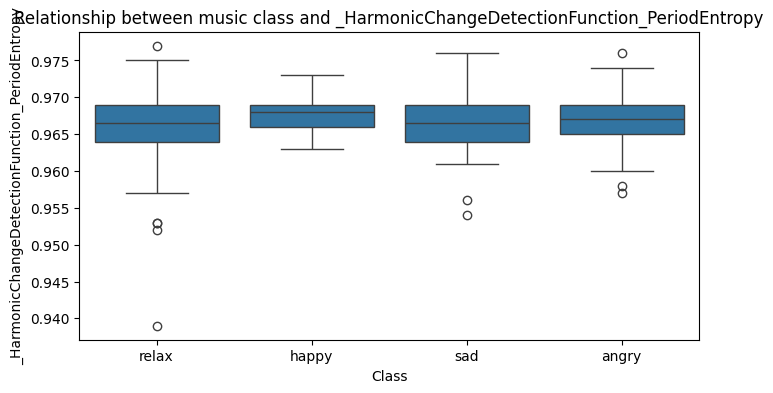

Confusion Matrix:


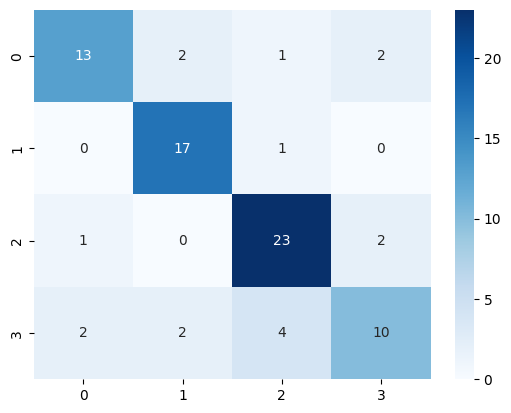

Accuracy: 0.7875,

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.72      0.76        18
           2       0.81      0.94      0.87        18
           3       0.79      0.88      0.84        26
           4       0.71      0.56      0.62        18

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.79      0.78        80

Average Accuracy with CV: 0.8


In [80]:
#Ajustar file path de acuerdo a donde se tenga el dataset ya limpio.
main(filepath=r'C:\Users\55144\OneDrive - ArcelorMittal\Documents\GitHub\mlops_team_20\notebooks\Data background\data\raw\Acoustic Features.csv')